<a href="https://colab.research.google.com/github/Aathivel-m/text_to_image/blob/main/text_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Root path where you uploaded the COCO 2017 micro dataset
coco_path = "/content/drive/MyDrive/coco2017_micro"

# Subfolders
train_dir = f"{coco_path}/train2017"
val_dir   = f"{coco_path}/val2017"
ann_dir   = f"{coco_path}/annotations"

print("Train images path:", train_dir)
print("Val images path:", val_dir)
print("Annotations path:", ann_dir)


Train images path: /content/drive/MyDrive/coco2017_micro/train2017
Val images path: /content/drive/MyDrive/coco2017_micro/val2017
Annotations path: /content/drive/MyDrive/coco2017_micro/annotations


In [3]:
import os

print("Train images:", len(os.listdir(train_dir)))
print("Val images:", len(os.listdir(val_dir)))
print("Annotation files:", os.listdir(ann_dir))


Train images: 79
Val images: 0
Annotation files: []


In [4]:
!pip install diffusers transformers accelerate safetensors
!pip install torch torchvision --upgrade


In [5]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import json
import os

# Load pretrained Stable Diffusion
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # use GPU

# Path to save generated images
save_path = "/content/drive/MyDrive/generated_images"
os.makedirs(save_path, exist_ok=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [6]:
prompt = "a red sports car driving on a mountain road"
image = pipe(prompt, guidance_scale=7.5).images[0]

# Show image
image.show()

# Save image
image.save(f"{save_path}/sports_car.png")
print("Image saved to:", save_path)


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved to: /content/drive/MyDrive/generated_images


In [7]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O annotations_trainval2017.zip


--2025-09-06 02:43:22--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.15.219.169, 16.15.186.168, 52.216.48.249, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.15.219.169|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  62.6MB/s    in 4.3s    

2025-09-06 02:43:27 (55.9 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [8]:
!unzip annotations_trainval2017.zip -d annotations2017


Archive:  annotations_trainval2017.zip
  inflating: annotations2017/annotations/instances_train2017.json  
  inflating: annotations2017/annotations/instances_val2017.json  
  inflating: annotations2017/annotations/captions_train2017.json  
  inflating: annotations2017/annotations/captions_val2017.json  
  inflating: annotations2017/annotations/person_keypoints_train2017.json  
  inflating: annotations2017/annotations/person_keypoints_val2017.json  


In [9]:
import shutil, os

# Define source and destination
src_folder = "/content/annotations2017/annotations"
dst_folder = "/content/drive/MyDrive/coco2017_micro/annotations"

# Copy files
for file_name in os.listdir(src_folder):
    full_src = os.path.join(src_folder, file_name)
    full_dst = os.path.join(dst_folder, file_name)
    shutil.copy(full_src, full_dst)

print("✅ All annotation files copied to Drive:", dst_folder)


✅ All annotation files copied to Drive: /content/drive/MyDrive/coco2017_micro/annotations


In [10]:
import os

ann_dir = "/content/drive/MyDrive/coco2017_micro/annotations"
print("Files in annotations folder:", os.listdir(ann_dir))


Files in annotations folder: ['instances_val2017.json', 'captions_val2017.json', 'person_keypoints_val2017.json', 'person_keypoints_train2017.json', 'instances_train2017.json', 'captions_train2017.json']


In [11]:
# Load captions JSON (validation set)
ann_file = f"{ann_dir}/captions_val2017.json"

import json

with open(ann_file) as f:
    captions_data = json.load(f)

# Check structure
print("Keys in file:", captions_data.keys())
print("Example annotation:", captions_data["annotations"][0])

# Extract first 5 captions safely
prompts = []
for ann in captions_data["annotations"][:5]:
    if "caption" in ann:   # only if caption exists
        prompts.append(ann["caption"])

print("Sample prompts:", prompts)

# Generate from prompts
for i, prompt in enumerate(prompts):
    img = pipe(prompt, guidance_scale=7.5).images[0]
    file_path = f"{save_path}/coco_generated_{i}.png"
    img.save(file_path)
    print(f"Prompt {i+1}: {prompt}")
    print(f"Saved -> {file_path}\n")


Keys in file: dict_keys(['info', 'licenses', 'images', 'annotations'])
Example annotation: {'image_id': 179765, 'id': 38, 'caption': 'A black Honda motorcycle parked in front of a garage.'}
Sample prompts: ['A black Honda motorcycle parked in front of a garage.', 'A Honda motorcycle parked in a grass driveway', 'An office cubicle with four different types of computers.', 'A small closed toilet in a cramped space.', 'Two women waiting at a bench next to a street.']


  0%|          | 0/50 [00:00<?, ?it/s]

Prompt 1: A black Honda motorcycle parked in front of a garage.
Saved -> /content/drive/MyDrive/generated_images/coco_generated_0.png



  0%|          | 0/50 [00:00<?, ?it/s]

Prompt 2: A Honda motorcycle parked in a grass driveway
Saved -> /content/drive/MyDrive/generated_images/coco_generated_1.png



  0%|          | 0/50 [00:00<?, ?it/s]

Prompt 3: An office cubicle with four different types of computers.
Saved -> /content/drive/MyDrive/generated_images/coco_generated_2.png



  0%|          | 0/50 [00:00<?, ?it/s]

Prompt 4: A small closed toilet in a cramped space.
Saved -> /content/drive/MyDrive/generated_images/coco_generated_3.png



  0%|          | 0/50 [00:00<?, ?it/s]

Prompt 5: Two women waiting at a bench next to a street.
Saved -> /content/drive/MyDrive/generated_images/coco_generated_4.png



In [12]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

# Pick one random annotation
ann = random.choice(captions_data["annotations"])
caption = ann["caption"]
image_id = ann["image_id"]

# Find the matching image entry in "images"
image_info = next(img for img in captions_data["images"] if img["id"] == image_id)
filename = image_info["file_name"]

# Build full path
real_img_path = os.path.join(val_dir, filename)

# Check if file exists
if not os.path.exists(real_img_path):
    print("⚠️ Real image not found in val2017 subset:", real_img_path)
else:
    # Generate an image from the caption
    gen_img = pipe(caption, guidance_scale=7.5).images[0]
    real_img = Image.open(real_img_path).convert("RGB")

    # Plot side by side
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.imshow(real_img)
    plt.title("Real COCO Image")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(gen_img)
    plt.title(f"Generated from caption:\n{caption}")
    plt.axis("off")
    plt.show()


⚠️ Real image not found in val2017 subset: /content/drive/MyDrive/coco2017_micro/val2017/000000272364.jpg


  0%|          | 0/50 [00:00<?, ?it/s]

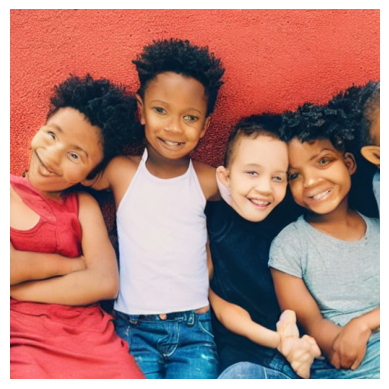

In [17]:
import matplotlib.pyplot as plt

prompt = "A boy with multiple girlfriends"
image = pipe(prompt, guidance_scale=7.5).images[0]
image.save(f"{save_path}/my_prompt.png")

# Show inside Colab
plt.imshow(image)
plt.axis("off")
plt.show()


In [18]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.9 MB/s eta 0:00:00
